In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

## Wrangle data

In [2]:
pitchers = pd.read_csv('fangraphs_season_level.csv')
pitchers = pitchers[pitchers['Season'] == 2023]
pitchers = pitchers[pitchers['IP'] >= 25]
pitchers = pitchers[['NameASCII', 'K_pct', 'BB_pct', 'H_per_9', 'xFIP', 'OSwing_pct', 'CSW_pct', 'HardHit_pct', 'Stuff_plus', 'Pitching_plus']]
pitchers = pitchers.set_index('NameASCII')
pitchers

,K_pct,BB_pct,H_per_9,xFIP,OSwing_pct,CSW_pct,HardHit_pct,Stuff_plus,Pitching_plus
NameASCII,,,,,,,,,
Adam Ottavino,0.2375,0.1111,6.713510,4.331163,0.2967,0.3035,0.4074,100.091211,95.718750
Kenley Jansen,0.2766,0.0904,8.059696,4.608799,0.3508,0.2859,0.3590,119.842580,111.271845
Jesse Chavez,0.2667,0.0815,6.958770,3.308249,0.2883,0.3247,0.3372,101.248069,96.436293
Ryan Brasier,0.2353,0.0798,6.335192,4.035840,0.3484,0.2608,0.4250,106.076598,106.066727
Huascar Brazoban,0.2529,0.1206,8.130677,4.097100,0.3631,0.2970,0.2803,90.740909,98.185375
...,...,...,...,...,...,...,...,...,...
Ken Waldichuk,0.2056,0.1113,9.524272,5.215195,0.2985,0.2453,0.3834,90.739079,91.470182
Kyle Harrison,0.2381,0.0748,7.528839,5.013914,0.3027,0.2840,0.3814,95.130102,97.885544
Andrew Abbott,0.2614,0.0959,8.231732,4.562998,0.3221,0.2692,0.4252,86.592770,96.961583


## Normalize Data

In [3]:
percentage_columns = ['K_pct', 'BB_pct', 'OSwing_pct', 'CSW_pct', 'HardHit_pct']
non_percentage_columns = ['H_per_9', 'xFIP', 'Stuff_plus', 'Pitching_plus']
minmax_scaler = MinMaxScaler()
df_non_percentage_scaled = pd.DataFrame(minmax_scaler.fit_transform(pitchers[non_percentage_columns]), 
                                        columns=non_percentage_columns, index=pitchers.index)
train = pd.concat([pitchers[percentage_columns], df_non_percentage_scaled], axis=1)
train

,K_pct,BB_pct,OSwing_pct,CSW_pct,HardHit_pct,H_per_9,xFIP,Stuff_plus,Pitching_plus
NameASCII,,,,,,,,,
Adam Ottavino,0.2375,0.1111,0.2967,0.3035,0.4074,0.239600,0.455522,0.397321,0.284638
Kenley Jansen,0.2766,0.0904,0.3508,0.2859,0.3590,0.356367,0.517769,0.591740,0.805361
Jesse Chavez,0.2667,0.0815,0.2883,0.3247,0.3372,0.260873,0.226181,0.408709,0.308661
Ryan Brasier,0.2353,0.0798,0.3484,0.2608,0.4250,0.206784,0.389310,0.456237,0.631092
Huascar Brazoban,0.2529,0.1206,0.3631,0.2970,0.2803,0.362524,0.403045,0.305284,0.367221
...,...,...,...,...,...,...,...,...,...
Ken Waldichuk,0.2056,0.1113,0.2985,0.2453,0.3834,0.483403,0.653725,0.305266,0.142394
Kyle Harrison,0.2381,0.0748,0.3027,0.2840,0.3814,0.310321,0.608598,0.348488,0.357183
Andrew Abbott,0.2614,0.0959,0.3221,0.2692,0.4252,0.371289,0.507501,0.264452,0.326248


## Find Optimal Number of Clusters

Text(0.5, 1.0, 'Elbow curve')

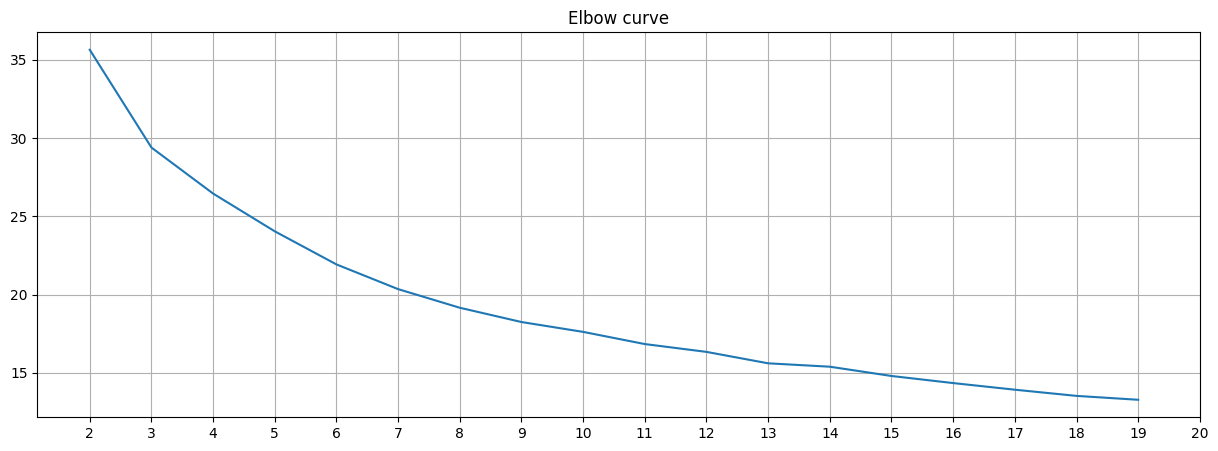

In [4]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(train)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.xticks(range(2, 21, 1))
plt.grid(True)
plt.title('Elbow curve')

In [5]:
from gap_statistic import OptimalK
import numpy as np

optimalK = OptimalK(parallel_backend='joblib')
n_clusters = optimalK(train, cluster_array=np.arange(1, 11))
print('Optimal number of clusters:', n_clusters)

Optimal number of clusters: 3


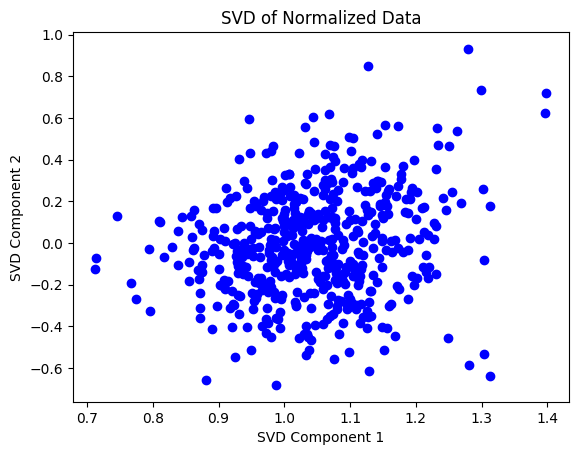

In [6]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2, random_state=42)
df_svd = svd.fit_transform(train)

plt.scatter(df_svd[:, 0], df_svd[:, 1], c='blue') 
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.title('SVD of Normalized Data')
plt.show()

## Implement Clustering Algorithm

In [7]:
k = 3

kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit(train)

clusters = kmeans.predict(train)
pitcher_clusters = pd.DataFrame(clusters, index=train.index, columns=["Cluster"])

pitcher_segmentation = pitcher_clusters.join(pitchers)
pitcher_segmentation


,Cluster,K_pct,BB_pct,H_per_9,xFIP,OSwing_pct,CSW_pct,HardHit_pct,Stuff_plus,Pitching_plus
NameASCII,,,,,,,,,,
A.J. Minter,2,0.3154,0.0808,7.793810,3.380627,0.3447,0.2955,0.3631,114.830916,104.517653
A.J. Puk,2,0.3223,0.0537,8.576466,3.017649,0.3326,0.3533,0.3221,115.080214,108.743315
Aaron Bummer,1,0.2921,0.1348,8.177147,3.511278,0.2968,0.3394,0.4459,102.798816,97.167304
Aaron Civale,1,0.2302,0.0655,8.019076,4.101492,0.3376,0.2886,0.3600,104.575142,103.677751
Aaron Loup,0,0.1948,0.0866,12.020540,4.596431,0.3451,0.2729,0.3720,97.935364,101.731780
...,...,...,...,...,...,...,...,...,...,...
Zach Eflin,2,0.2646,0.0341,8.003737,3.124702,0.3718,0.3017,0.3490,97.899030,105.748545
Zack Greinke,0,0.1621,0.0387,9.961832,4.442646,0.3173,0.2449,0.3828,84.171591,100.191026
Zack Littell,1,0.1918,0.0171,8.831780,4.149458,0.3551,0.2624,0.4009,89.806721,103.696538


In [8]:
from sklearn.metrics import silhouette_score
labels = kmeans.fit_predict(train)

silhouette_avg = silhouette_score(train, labels)
print("The Silhouette Score is:", silhouette_avg)

The Silhouette Score is: 0.22179713736224038


## Interpret Clusters

In [33]:
pitcher_segmentation[pitcher_segmentation['Cluster'] == 0].head(10)

,Cluster,K_pct,BB_pct,H_per_9,xFIP,OSwing_pct,CSW_pct,HardHit_pct,Stuff_plus,Pitching_plus
NameASCII,,,,,,,,,,
Aaron Loup,0,0.1948,0.0866,12.020540,4.596431,0.3451,0.2729,0.3720,97.935364,101.731780
Adam Wainwright,0,0.1136,0.0847,13.455446,5.770711,0.2376,0.2450,0.3876,102.936827,96.534133
Adrian Houser,0,0.2048,0.0697,9.818213,4.252808,0.2762,0.2609,0.4639,82.898123,97.096701
Adrian Martinez,0,0.1913,0.0783,9.569614,4.658099,0.2888,0.2470,0.3720,87.678271,92.057761
Alec Marsh,0,0.2529,0.1092,8.076923,4.463607,0.3238,0.2932,0.3925,97.023308,95.356541
Alec Marsh,0,0.2440,0.1190,10.698123,5.256200,0.3168,0.2806,0.4412,95.986558,93.119350
Alek Manoah,0,0.1904,0.1422,9.583973,5.845294,0.2921,0.2416,0.4440,89.311930,92.677998
Alex Wood,0,0.1667,0.0810,8.403979,4.639166,0.2988,0.2663,0.3590,82.381427,95.532349
Alex Wood,0,0.1781,0.1142,9.697190,5.667742,0.2794,0.2718,0.3893,91.274163,91.097967


In [34]:
pitcher_segmentation[pitcher_segmentation['Cluster'] == 1].head(10)

,Cluster,K_pct,BB_pct,H_per_9,xFIP,OSwing_pct,CSW_pct,HardHit_pct,Stuff_plus,Pitching_plus
NameASCII,,,,,,,,,,
Aaron Bummer,1,0.2921,0.1348,8.177147,3.511278,0.2968,0.3394,0.4459,102.798816,97.167304
Aaron Civale,1,0.2302,0.0655,8.019076,4.101492,0.3376,0.2886,0.3600,104.575142,103.677751
Adam Ottavino,1,0.2375,0.1111,6.713510,4.331163,0.2967,0.3035,0.4074,100.091211,95.718750
Albert Abreu,1,0.2276,0.1306,7.932203,4.981388,0.2684,0.2816,0.4157,103.664080,96.016092
Alec Marsh,1,0.2529,0.1092,8.076923,4.463607,0.3238,0.2932,0.3925,97.023308,95.356541
Alec Marsh,1,0.2440,0.1190,10.698123,5.256200,0.3168,0.2806,0.4412,95.986558,93.119350
Alex Cobb,1,0.2028,0.0573,9.693854,3.512411,0.3236,0.2762,0.4322,90.977791,100.454233
Alex Faedo,1,0.2107,0.0744,7.210223,4.686202,0.3327,0.2720,0.3488,91.769706,100.675157
Alex Lange,1,0.2743,0.1563,5.863636,4.381721,0.3266,0.3243,0.3608,120.872423,95.887753


In [35]:
pitcher_segmentation[pitcher_segmentation['Cluster'] == 2].head(10)

,Cluster,K_pct,BB_pct,H_per_9,xFIP,OSwing_pct,CSW_pct,HardHit_pct,Stuff_plus,Pitching_plus
NameASCII,,,,,,,,,,
A.J. Minter,2,0.3154,0.0808,7.793810,3.380627,0.3447,0.2955,0.3631,114.830916,104.517653
A.J. Puk,2,0.3223,0.0537,8.576466,3.017649,0.3326,0.3533,0.3221,115.080214,108.743315
Aaron Nola,2,0.2547,0.0567,8.271930,3.631652,0.3740,0.2964,0.3853,101.231098,105.789731
Abner Uribe,2,0.3071,0.1575,4.695647,3.682442,0.2508,0.3115,0.4328,138.802930,97.916797
Adbert Alzolay,2,0.2648,0.0514,7.312500,3.555058,0.3440,0.2924,0.3690,104.604233,104.019788
Alex Vesia,2,0.2911,0.0798,9.431501,4.188491,0.3255,0.2741,0.4318,116.579177,108.178208
Andres Munoz,2,0.3175,0.1043,7.346939,3.118180,0.3551,0.3589,0.3590,119.757365,103.758802
Andrew Nardi,2,0.3080,0.0886,7.063957,3.458545,0.3481,0.2850,0.2662,111.715928,107.400105
Angel Perdomo,2,0.3761,0.0940,6.517241,3.151149,0.2744,0.3204,0.3729,97.898160,101.894479
